<a href="https://colab.research.google.com/github/wcrowley342/github-slideshow/blob/master/Hitchhikers_guide_to_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://github.com/conordewey3/Hitchhikers-Guide-Machine-Learning/blob/master/Hitchhiker's%20Guide%20to%20Machine%20Learning%20Algorithms%20in%20Python.ipynb

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn import linear_model


In [8]:
from google.colab import files
data_to_load=files.upload()

Saving linear_regression_df.csv to linear_regression_df (2).csv


In [10]:
df = pd.read_csv('linear_regression_df.csv')
df.columns = ['X','Y']
df.head

<bound method NDFrame.head of       X      Y
0   108  392.5
1    19   46.2
2    13   15.7
3   124  422.2
4    40  119.4
..  ...    ...
58    9   87.4
59   31  209.8
60   14   95.5
61   53  244.6
62   26  187.5

[63 rows x 2 columns]>

Text(0.5, 10.255999999999986, 'Explanatory')

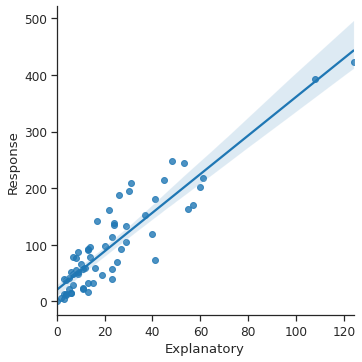

In [11]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('X','Y', data=df)
plt.ylabel('Response')
plt.xlabel('Explanatory')

In [12]:
linear = linear_model.LinearRegression()

trainX = np.asarray(df.X[20:len(df.X)]).reshape(-1, 1)
trainY = np.asarray(df.Y[20:len(df.Y)]).reshape(-1, 1)

testX = np.asarray(df.X[:20]).reshape(-1, 1)
testY = np.asarray(df.Y[:20]).reshape(-1, 1)

linear.fit(trainX, trainY)
linear.score(trainX, trainY)

print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print('R^2 Value: \n', linear.score(trainX, trainY))

predicted = linear.predict(testX)

Coefficient: 
 [[3.43948437]]
Intercept: 
 [24.00493255]
R^2 Value: 
 0.7036549053548855


In [14]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

SUPPORT VECTOR MACHINE (SVM)

In [19]:
from sklearn import svm
df = iris
df.columns = ['X4','X3','X1','X2','Y']
df=df.drop(['X4','X3'], 1)
df.head

<bound method NDFrame.head of       X1   X2          Y
0    1.4  0.2     setosa
1    1.4  0.2     setosa
2    1.3  0.2     setosa
3    1.5  0.2     setosa
4    1.4  0.2     setosa
..   ...  ...        ...
145  5.2  2.3  virginica
146  5.0  1.9  virginica
147  5.2  2.0  virginica
148  5.4  2.3  virginica
149  5.1  1.8  virginica

[150 rows x 3 columns]>

In [22]:
from sklearn.model_selection import train_test_split

support = svm.SVC()

X = df.values[:, 0:2]
Y = df.values[:, 2]
trainX, testX, trainY, testY = train_test_split( X, Y, test_size = 0.3)

support.fit(trainX, trainY)
print('Accuracy: \n', support.score(testX, testY))

pred = support.predict(testX)

Accuracy: 
 0.9777777777777777


Text(0.5, 10.255999999999986, 'X1')

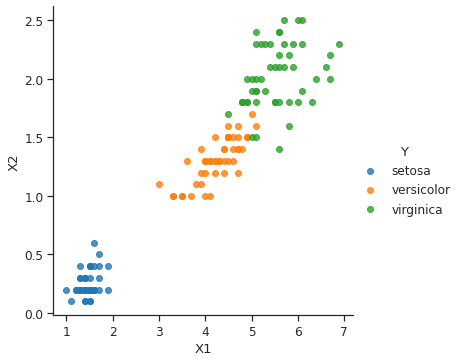

In [23]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('X1','X2', scatter=True, fit_reg=False, data=df, hue='Y')
plt.ylabel('X2')
plt.xlabel('X1')

KNN K nearest neighbhor 

In [25]:
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
iris = sns.load_dataset('iris')
iris.head

df = iris
df.columns = ['X4','X3','X1','X2','Y']
df=df.drop(['X4','X3'], 1)
df.head()

,X1,X2,Y
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


Text(0.5, 10.255999999999986, 'X1')

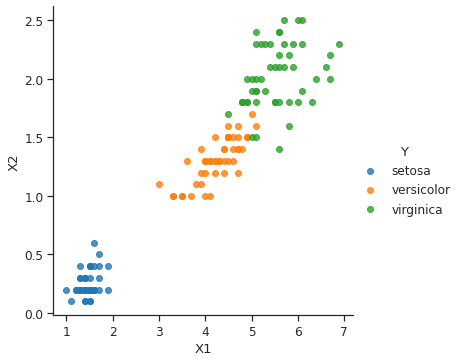

In [29]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('X1','X2', scatter=True, fit_reg=False, data=df, hue='Y')
plt.ylabel('X2')
plt.xlabel('X1')

*UNSUPERVISED LEARNING*

K-Means Clustering

In [31]:
from sklearn.cluster import KMeans

import seaborn as sns
iris = sns.load_dataset('iris')
iris.head

df = iris
df.columns = ['X1','X2','X3','X4','Y']
df=df.drop(['X4','X3'], 1)
df.head()

,X1,X2,Y
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


In [33]:
from sklearn.model_selection import train_test_split

kmeans = KMeans(n_clusters=3)
X = df.values[:, 0:2]
kmeans.fit(X)
df['Pred'] = kmeans.predict(X)
df.head()

,X1,X2,Y,Pred
0,5.1,3.5,setosa,2
1,4.9,3.0,setosa,2
2,4.7,3.2,setosa,2
3,4.6,3.1,setosa,2
4,5.0,3.6,setosa,2


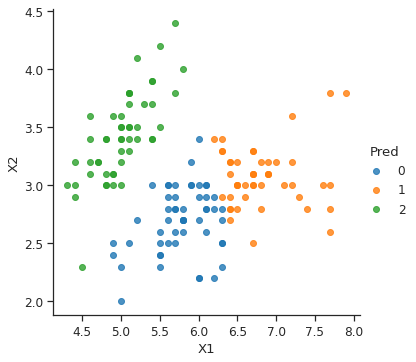

In [34]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('X1','X2', scatter=True, fit_reg=False, data=df, hue = 'Pred')

In [37]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df1 = pd.read_csv(url)
df1.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

Code snippets



In [38]:
# load an example dataset
from vega_datasets import data
cars = data.cars()


# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_bar().encode(
  x=alt.X('Miles_per_Gallon', bin=True),
  y='count()',
  color='Origin'
)

alt.Chart(...)